In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout,Flatten
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns

In [4]:
data = pd.read_csv('bank.csv')

In [6]:
data['deposit'].unique()

array(['yes', 'no'], dtype=object)

In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [20]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [23]:
labelencoder = LabelEncoder()
data["job"] = labelencoder.fit_transform(data["job"])
labelencoder = LabelEncoder()
data["marital"] = labelencoder.fit_transform(data["marital"])
labelencoder = LabelEncoder()
data["education"] = labelencoder.fit_transform(data["education"])
labelencoder = LabelEncoder()
data["default"] = labelencoder.fit_transform(data["default"])
labelencoder = LabelEncoder()
data["housing"] = labelencoder.fit_transform(data["housing"])
labelencoder = LabelEncoder()
data["loan"] = labelencoder.fit_transform(data["loan"])
labelencoder = LabelEncoder()
data["contact"] = labelencoder.fit_transform(data["contact"])
labelencoder = LabelEncoder()
data["month"] = labelencoder.fit_transform(data["month"])
labelencoder = LabelEncoder()
data["poutcome"] = labelencoder.fit_transform(data["poutcome"])
labelencoder = LabelEncoder()
data["deposit"] = labelencoder.fit_transform(data["deposit"])

In [24]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [29]:
data.contact.unique()

array([2, 0, 1])

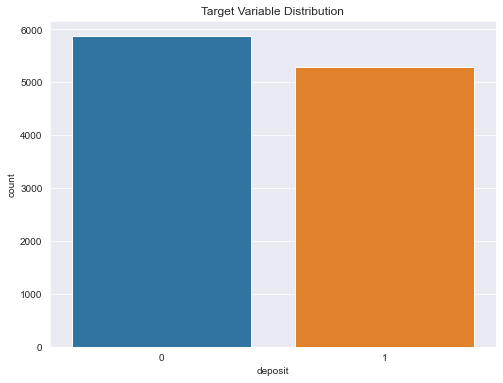

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(x= data.deposit)
plt.title('Target Variable Distribution')
plt.show()

In [34]:
data.deposit.value_counts(normalize = True)

0    0.52616
1    0.47384
Name: deposit, dtype: float64

In [42]:
Input = data.drop(columns = ['deposit'], axis=1)
Output = data[['deposit']]


In [45]:
Input_train, Input_test, Output_train, Output_test = train_test_split(Input,Output, test_size = 0.3)

In [46]:
Input_train_norm = preprocessing.normalize(Input_train)
Input_test_norm = preprocessing.normalize(Input_test)

In [47]:
model = Sequential([
  Dense(192, activation='relu',input_dim= 16),
  Dense(256, activation='relu'),
  Dense(512, activation='relu'),
  Dense(1, activation='sigmoid')])

In [50]:
# Compile K model.
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])

In [51]:
history = model.fit(
    Input_train_norm,
    Output_train,                
    epochs = 50,
    batch_size=10,
    validation_split=0.2,
    callbacks=[])

Epoch 1/50
625/625 [==============================] - 2s 3ms/step - loss: 0.5698 - accuracy: 0.6966 - val_loss: 0.4968 - val_accuracy: 0.7620
Epoch 2/50
625/625 [==============================] - 2s 2ms/step - loss: 0.5203 - accuracy: 0.7410 - val_loss: 0.5014 - val_accuracy: 0.7735
Epoch 3/50
625/625 [==============================] - 1s 2ms/step - loss: 0.5080 - accuracy: 0.7520 - val_loss: 0.4903 - val_accuracy: 0.7742
Epoch 4/50
625/625 [==============================] - 2s 3ms/step - loss: 0.4991 - accuracy: 0.7533 - val_loss: 0.4889 - val_accuracy: 0.7626
Epoch 5/50
625/625 [==============================] - 1s 2ms/step - loss: 0.4972 - accuracy: 0.7581 - val_loss: 0.4921 - val_accuracy: 0.7722
Epoch 6/50
625/625 [==============================] - 1s 2ms/step - loss: 0.4895 - accuracy: 0.7658 - val_loss: 0.4812 - val_accuracy: 0.7690
Epoch 7/50
625/625 [==============================] - 1s 2ms/step - loss: 0.4849 - accuracy: 0.7675 - val_loss: 0.4711 - val_accuracy: 0.7825
Epoch 

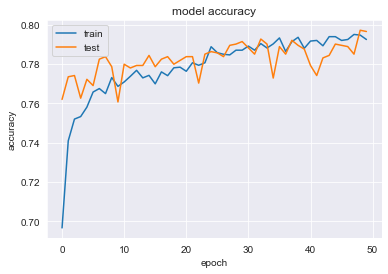

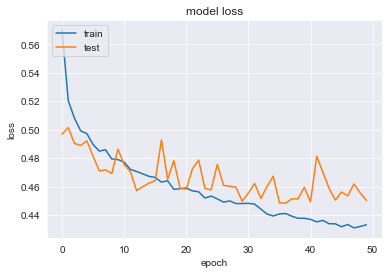

In [53]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()